In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df_proba = pd.read_csv("test_probas.csv")
df_proba = df_proba.rename(columns={'0':'approved', '1':'rejected'})
df_proba

,Unnamed: 0,approved,rejected,target
0,0,0.573103,0.426897,1.0
1,1,0.970779,0.029221,0.0
2,2,0.951003,0.048997,0.0
3,3,0.990895,0.009105,0.0
4,4,0.982559,0.017441,0.0
...,...,...,...,...
172759,172759,0.951718,0.048282,0.0
172760,172760,0.950756,0.049244,0.0
172761,172761,0.915068,0.084932,0.0
172762,172762,0.945026,0.054974,1.0


In [3]:
df_proba.target.value_counts()

0.0    158457
1.0     14307
Name: target, dtype: int64

In [4]:
df_proba.describe()

,Unnamed: 0,approved,rejected,target
count,172764.00000,172764.000000,172764.000000,172764.000000
mean,86381.50000,0.914884,0.085116,0.082812
std,49872.81529,0.092048,0.092048,0.275599
min,0.00000,0.120596,0.001658,0.000000
25%,43190.75000,0.894351,0.027431,0.000000
50%,86381.50000,0.947903,0.052097,0.000000
75%,129572.25000,0.972569,0.105649,0.000000
max,172763.00000,0.998342,0.879404,1.000000


In [5]:
def cout(data: pd.DataFrame, seuil: float):
    print(f"seuil = {seuil}")
    df = data.copy()
    df["prediction"] = np.where(df.approved > seuil, 0.0, 1.0)
    tp = df.loc[(df.prediction == 0) & (df.target == 0),:].shape[0]
    fp = df.loc[(df.prediction == 0) & (df.target == 1),:].shape[0]
    tn = df.loc[(df.prediction == 1) & (df.target == 1),:].shape[0]
    fn = df.loc[(df.prediction == 1) & (df.target == 0),:].shape[0]
    print(f"fp = {fp}")
    print(f"fn = {fn}")
    print(f"tx d'erreur = {(fp + fn) / (tp+fp+tn+fn)}")
    return 10*fp + 1*fn

In [6]:
couts = {seuil: cout(df_proba, seuil) for seuil in np.arange(0,1.01,0.01)}
df_couts = pd.DataFrame.from_dict(couts, orient="index", columns=["cout"]).reset_index().rename(columns={'index':'seuil'})
df_couts

seuil = 0.0
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.01
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.02
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.03
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.04
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.05
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.06
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.07
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.08
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.09
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.1
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.11
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.12
fp = 14307
fn = 0
tx d'erreur = 0.08281239147044524
seuil = 0.13
fp = 14306
fn = 0
tx d'erreur = 0.08280660322752426
seuil = 0.14
fp = 14306
fn = 0
tx d'erreur = 0.08280660322752426
seuil = 0.15
fp = 14305
fn 

,seuil,cout
0,0.00,143070
1,0.01,143070
2,0.02,143070
3,0.03,143070
4,0.04,143070
...,...,...
96,0.96,99622
97,0.97,114490
98,0.98,133916
99,0.99,153576


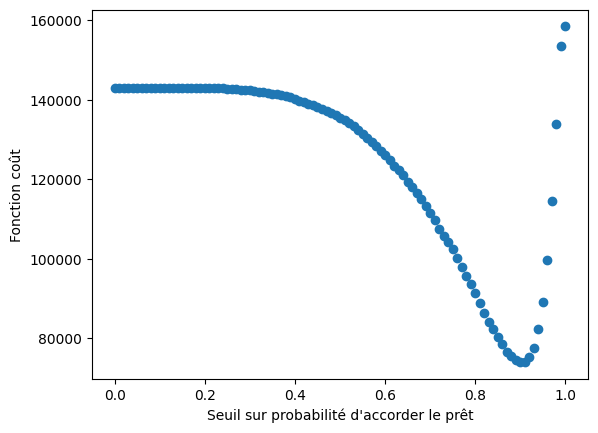

In [7]:
plt.scatter(df_couts.seuil, df_couts.cout)
plt.xlabel("Seuil sur probabilité d'accorder le prêt")
plt.ylabel("Fonction coût")
plt.show()

In [8]:
constants = {'SEUIL_CLASSIF': df_couts.loc[np.argmin(df_couts.cout),"seuil"]}
constants

{'SEUIL_CLASSIF': 0.9}

In [9]:
import json
json.dump(constants, open("constants.json", "w"))